In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import os
import glob
import cv2

from PIL import Image
%matplotlib inline

In [2]:
data_folder = '/Users/vng/PycharmProjects/ocr_data/cinnamon_ocr'
label_file = '/Users/vng/PycharmProjects/ocr_data/cinnamon_ocr/labels.json'

In [5]:
with open(label_file, 'r') as f:
    labels = json.load(f)

In [26]:
top_error_file = '/Users/vng/PycharmProjects/ocr_data/top_error_image.log'

label_list = []
with open(top_error_file, 'r') as file:
    for line in file:
        line = line[1:-1].rpartition(',')[0][1:-1]
        label_list.append(line)
        
label_list.reverse()

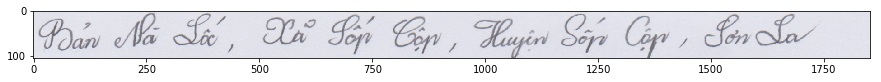

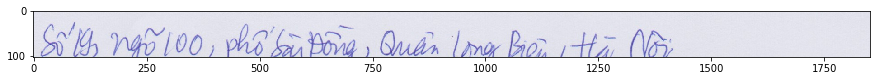

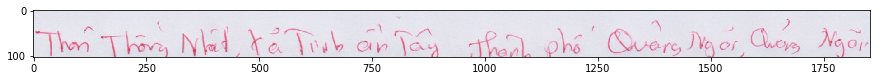

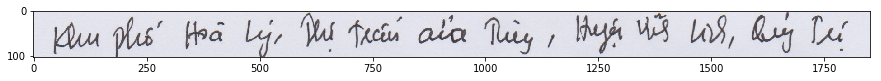

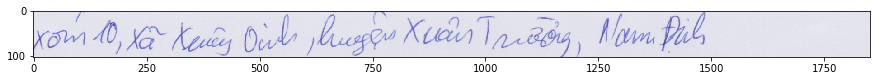

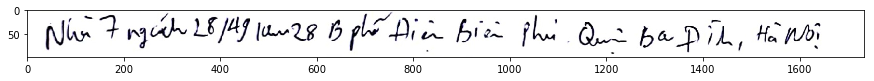

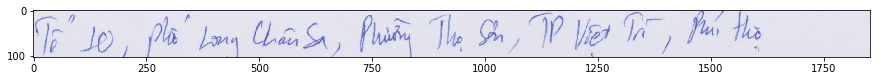

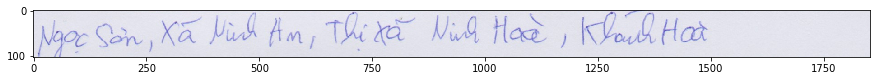

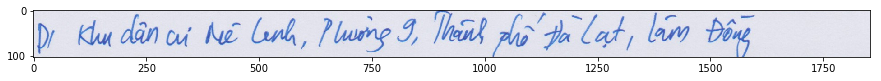

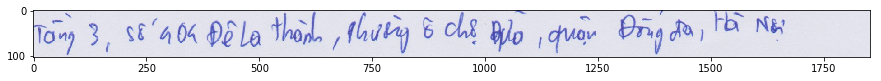

In [54]:
for i in range(10):
    plt.figure(figsize=(15, 10))
    
    label = label_list[i]
    for key, value in labels.items():
        if value == label:
            image_path = os.path.join(data_folder, key)
            img=mpimg.imread(image_path)
            imgplot = plt.imshow(img)
            plt.show()


### Pre-Process image

#### Convert to grayscale

In [62]:
train_folder = '/Users/vng/PycharmProjects/ocr_data/cinnamon_train'
test_folder = '/Users/vng/PycharmProjects/ocr_data/cinnamon_valid'

In [63]:
def convert_img_to_grayscale(image_path, save_dir):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_name = image_path.split('/')[-1]
    save_path = os.path.join(save_dir, img_name.split('.')[0] + '_gray.png')
    cv2.imwrite(save_path, img)

In [64]:
def convert_grayscale(image_folder):
    for name in glob.glob(image_folder + '/*.png'):
        save_dir = os.path.join(image_folder, 'gray')
        convert_img_to_grayscale(name, save_dir)

In [ ]:
convert_grayscale(train_folder)

#### Threadhold

In [67]:
def thread_hold_img(image_path, save_dir, subtract):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_name = image_path.split('/')[-1]
    save_path = os.path.join(save_dir, img_name.split('.')[0] + '_thread_' + str(subtract) + '.png')
    
    thresh = img.mean()
    img = cv2.threshold(img, thresh-subtract, 255, cv2.THRESH_BINARY)[1]
    cv2.imwrite(save_path, img)

In [79]:
def thread_hold_all(image_folder, subtract):
    for name in glob.glob(image_folder + '/*.jpg'):
        save_dir = os.path.join(image_folder, 'gray')
        thread_hold_img(name, save_dir, subtract)

In [75]:
thread_hold_all(train_folder, 0)
thread_hold_all(test_folder, 0)

In [83]:
thread_hold_all('/Users/vng/PycharmProjects/ocr_data/cinnamon_test_1', 30)

#### Test

In [56]:
test_image = '/Users/vng/PycharmProjects/ocr_data/cinnamon_ocr/0000_samples.png'
# test_image = '/Users/vng/PycharmProjects/ocr_data/cinnamon_test_1/13.jpg'

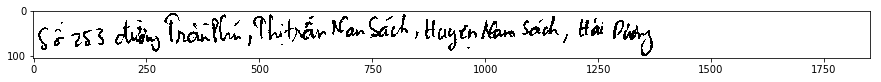

In [66]:
plt.figure(figsize=(15, 10))
img = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
thresh = img.mean()
im_bw = cv2.threshold(img, thresh-10, 255, cv2.THRESH_BINARY)[1]

imgplot = plt.imshow(im_bw, cmap='gray')
plt.show()

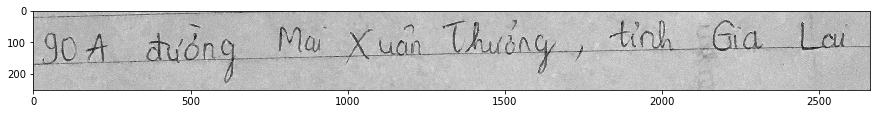

In [52]:
plt.figure(figsize=(15, 10))
img = cv2.multiply(img, 1.2)
plt.imshow(img, cmap='gray')
plt.show()

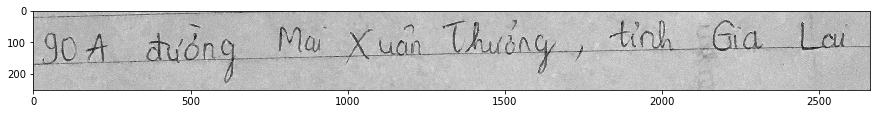

In [53]:
plt.figure(figsize=(15, 10))

kernel = np.ones((1, 1), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img, cmap='gray')
plt.show()

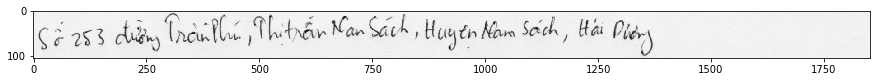

In [5]:
plt.figure(figsize=(15, 10))
img = cv2.imread(test_image)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap = 'gray')
plt.show()

In [6]:
gray_image[gray_image <= gray_image.mean() - 20] = 0
gray_image[gray_image > gray_image.mean() - 20] = 255

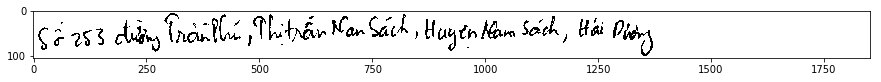

In [7]:
plt.figure(figsize=(15, 10))
plt.imshow(gray_image, cmap = 'gray')
plt.show()

#### Increase Contrast

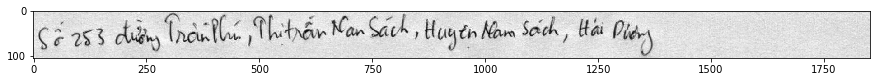

In [16]:
plt.figure(figsize=(15, 10))
img = cv2.imread(test_image)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = 'gray')
plt.show()

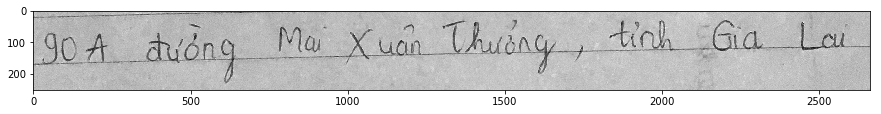

In [99]:
test_sample_2 = '/Users/vng/PycharmProjects/ocr_data/cinnamon_test_1/13.jpg'

plt.figure(figsize=(15, 10))
img = cv2.imread(test_sample_2)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap = 'gray')
plt.show()

In [100]:
print(gray_image.mean())

117.84115067448401


In [101]:
gray_image[gray_image <= gray_image.mean() - 20] = 0
gray_image[gray_image > gray_image.mean() - 20] = 255

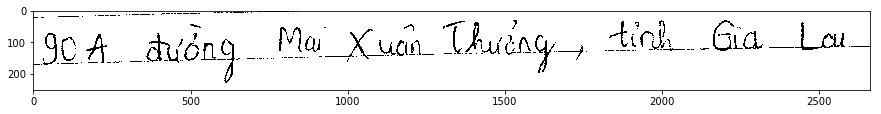

In [102]:
plt.figure(figsize=(15, 10))
plt.imshow(gray_image, cmap = 'gray')
plt.show()